# Introduzione all'Intelligenza Artificiale
## Supporto per le esercitazioni

Questo notebook rappresenta una guida all'implementazione e utilizzo dei principali algoritmi e modelli presentati nell'ambito del corso "Introduzione all'Intelligenza Artificiale", corso di Laurea in Informatica, Università di Pisa, anno accademico 2024/2025.

Il codice presentato di seguito è un'implementazione delle funzioni riportate nel testo di riferimento del corso:<br/>
*S. Russell, P. Norvig, "Artificial Intelligence: A Modern Approach, Pearson, 4th Edition, 2020*

Ulteriori risorse possono essere reperite online all'indirizzo: https://github.com/aimacode

Questo notebook contiene degli esempi di utilizzo dei modelli di apprendimento automatico, con particolare attenzione al modello lineare implementato in $\texttt{linear_model.py}$.<br/>

# Rappresentazione di un dataset

Un dataset è rappresentato mediante la classe $\texttt{DataSet}$, implementata in $\texttt{learning.py}$.
Data un'istanza $\texttt{d}$ di $\texttt{DataSet}$, gli attributi principali sono:

* $\texttt{d.examples}$: una lista di esempi; ogni esempio è rappresentato come una lista di valori di attributi;
* $\texttt{d.inputs}$: una lista di indici, corrispondenti agli attributi di input in ogni esempio;
* $\texttt{d.target}$: l'indice corrispondete all'attributo target in ogni esempio.



Il modo più semplice di costruire un dataset consiste nell'importarlo da un file in formato *csv*.
Il dataset viene caricato specificando il nome del file nel costruttore di $\texttt{DataSet}$.

Un file *csv* segue un semplice formato:
* ogni linea del file corrisponde ad un esempio
* gli attributi di ogni esempio vengono riportati di seguito, separati da virgole

Di seguito, un estratto del file *iris.csv* come esempio del formato dati utilizzato.

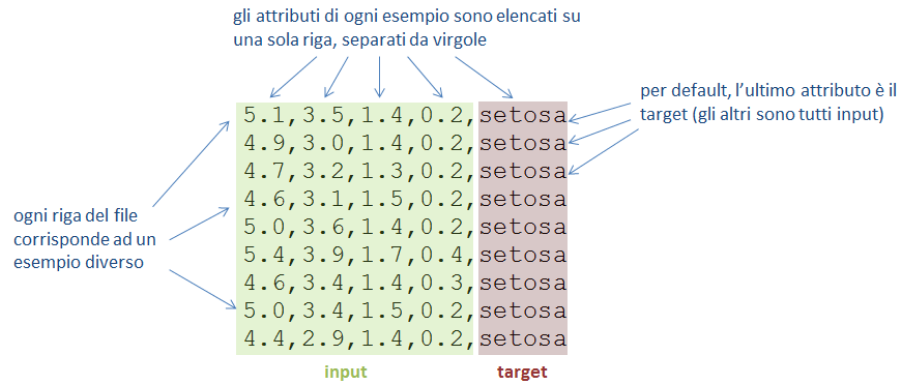

In [1]:
!git clone https://github.com/luigiquara/IIA-python.git
%cd IIA-python/learning/src
from learning import DataSet


Cloning into 'IIA-python'...
remote: Enumerating objects: 370, done.
remote: Counting objects: 100% (187/187), done.
remote: Compressing objects: 100% (135/135), done.
remote: Total 370 (delta 97), reused 117 (delta 46), pack-reused 183 (from 1)
Receiving objects: 100% (370/370), 354.24 KiB | 4.79 MiB/s, done.
Resolving deltas: 100% (194/194), done.
/content/IIA-python/learning/src


### Dataset di esempio
All'interno della cartella *dataset* sono presenti alcuni dataset in formato *csv*.<br/>
In questa esercitazione, utilizzeremo il dataset $\texttt{simplefit}$ come esempio di regressione, e il dataset $\texttt{iris}$ come esempio di classificazione.

In [2]:
simplefit_dataset = DataSet(name='simplefit')
iris_dataset = DataSet(name='iris')

### Manipolazione di un dataset
La classe $\texttt{Dataset}$ offre funzionalità aggiuntive per la manipolazione di un dataset.<br/>
Per illustrare tali metodi, e per semplicità, di seguito il dataset $\texttt{iris}$ viene adattato ad un problema di classificazione binaria.

In [3]:
# il metodo remove_examples elimina dal dataset
# gli esempi che contengono un determinato valore
# in questo caso, eliminiamo gli esempi della classe 'virginica'
iris_dataset.remove_examples('virginica')

# il metodo classes_to_numbers converte etichette categoriche in interi
classes = ['setosa', 'versicolor']
iris_dataset.classes_to_numbers(classes)

# Misure d'errore

È necessario definire delle funzioni per valutare l'efficacia di apprendimento dei modelli utilizzati.<br/>
In questa esercitazione, utilizzeremo una funzione di loss per il problema di regressione, e una misura di accuratezza per il problema di classificazione.

In [4]:
from learning import accuracy_binary, mse_loss

# mse_loss indica l'errore quadratico medio
# da utilizzare per problemi di regressione
reg_loss = mse_loss

# accuracy_binary calcola l'accuratezza di un modello
# per un problema di classificazione binaria.
acc = accuracy_binary

# Il modello lineare

Di seguito l'esecuzione del modello lineare sui dataset definiti in precedenza.

$LinearModel$ richiede in input:
* $\texttt{dataset}$: oggetto della classe $\texttt{DataSet}$;
* $\texttt{learning_rate}$: valore utilizzato per l'aggiornamento dei pesi;
* $\texttt{epochs}$: numero di epoche di addestramento.

Il modello lineare ha poi un metodo $\texttt{fit}()$, utilizzato per l'addestramento a partire dai dati di training, e un metodo $\texttt{predict}()$ per effettuare predizioni.

Viene utilizzata la tecnica di cross-validation per valutare le performance del modello.



In [5]:
from learning import cross_validation
from linear_model import LinearModel

In [6]:
# Esempio di utilizzo del modello lineare sul dataset 'simplefit'

# definizione dei parametri necessari
n_folds = 5 # numero di fold per la cross-validation
learning_rate = 0.01
epochs = 1000

# viene utilizzato il dataset simplefit
# e la loss per problemi di regressione -  in questo caso mse_loss
cv_performance = cross_validation(LinearModel, simplefit_dataset, reg_loss, n_folds,
                                  learning_rate=learning_rate, epochs=epochs)

print('Performance del modello lineare sul task di regressione "simplefit"')
print(f'Training MSE = {cv_performance[0]} -- Validation MSE = {cv_performance[1]}')

Performance del modello lineare sul task di regressione "simplefit"
Training MSE = 40.46935781622884 -- Validation MSE = 40.669230357322924


In [7]:
# Esempio di utilizzo del modello lineare sul dataset 'iris'

# definizione dei parametri necessari
n_folds = 5 # numero di fold per la cross-validation
learning_rate = 0.01
epochs = 100

# viene utilizzato il dataset iris
# e il calcolo di accuratezza per problemi di classificazione binaria
cv_performance = cross_validation(LinearModel, iris_dataset, acc, k=n_folds,
                                  learning_rate=learning_rate, epochs=epochs)

print('Performance del modello lineare sul task di classificazione "iris" (in versione binaria)')
print('TR accuracy = %s -- VL accuracy = %s' % (cv_performance[0],cv_performance[1]))

Performance del modello lineare sul task di classificazione "iris" (in versione binaria)
TR accuracy = 0.5925 -- VL accuracy = 0.5599999999999999


# L'Albero Decisionale

Di seguito l'esecuzione di un albero decisionale sul dataset $\texttt{simplefit}$.

$DecisionTreeLearner$ richiede in input:
* $\texttt{dataset}$: oggetto della classe $\texttt{DataSet}$.

Il costruttore della classe definisce l'albero sul dataset ricevuto in input.
Il modello ha poi un metodo $\texttt{predict}()$ per effettuare predizioni.

$\texttt{DecisionTreeLearner}$ utilizza le classi di supporto $\texttt{DecisionFork}$ e $\texttt{DecisionLeaf}$.<br/>
$\texttt{DecisionFork}$ rappresenta una biforcazione all'intero dell'albero decisionale. Quando l'oggetto viene chiamato, l'esempio in input viene classificato in base all'attributo della biforcazione, e viene restituito il ramo selezionato.<br/>
$\texttt{DecisionLeaf}$ rappresenta invece una foglia dell'albero decisionale. Viene utilizzata per contenere un risultato.

Viene utilizzata la tecnica di cross-validation per valutare le performance del modello

In [8]:
from decision_tree import DecisionTreeLearner

In [9]:
# Esempio di utilizzo dell'albero decisionale sul dataset 'simplefit'

# definizione dei parametri necessari
n_folds = 5 # numero di fold per la cross-validation

# viene utilizzato il dataset simplefit
# e la loss per problemi di regressione -  in questo caso mse_loss
cv_performance = cross_validation(DecisionTreeLearner, simplefit_dataset, reg_loss, n_folds)

print("Performance dell'albero decisionale sul task di regressione 'simplefit'")
print(f'Training MSE = {cv_performance[0]} -- Validation MSE = {cv_performance[1]}')

Performance dell'albero decisionale sul task di regressione 'simplefit'
Training MSE = 0.0 -- Validation MSE = 21.007859864024446


# k-Nearest Neighbors

Di seguito l'esecuzione dell'algoritmo *KNN* sul dataset $\texttt{simplefit}$.

$\texttt{NearestNeighborLearner}$ richiede in input:
* $\texttt{dataset}$: oggetto della classe $\texttt{DataSet}$;
* $\texttt{k}$: numero di vicini da considerare.

La classe ha un metodo $\texttt{predict}()$ per calcolare l'output del modello. La predizione viene determinata da un voto di maggioranza tra gli elementi più vicini, che restituisce il valore di target più presente tra i vicini.

Viene utilizzata la tecnica di cross-validation per valutare le performance del modello.

In [10]:
from knn import NearestNeighborLearner

In [15]:
# Esempio di utilizzo dell'algoritmo KNN sul dataset 'simplefit'

# definizione dei parametri necessari
n_folds = 5 # numero di fold per la cross-validation
K = 10 # numero di vicini da considerare

# viene utilizzato il dataset simplefit
# e la loss per problemi di regressione -  in questo caso mse_loss
cv_performance = cross_validation(NearestNeighborLearner, simplefit_dataset, reg_loss, n_folds, K = K)

print("Performance dell'algoritmo KNN sul task di regressione 'simplefit'")
print(f'Training MSE = {cv_performance[0]} -- Validation MSE = {cv_performance[1]}')

Performance dell'algoritmo KNN sul task di regressione 'simplefit'
Training MSE = 0.0 -- Validation MSE = 8.622594577591112
